In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
#specific the name of each column
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = read_csv(url, names=names)

In [8]:
#dimension  of dataset
#shape
dataset.shape

(150, 5)

In [9]:
#peek a data
#head
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
#Statistical Summary
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#Class Distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

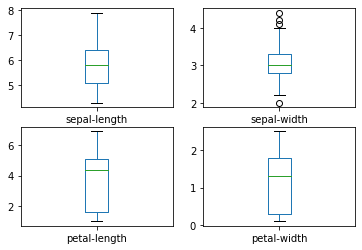

In [14]:
#Univariate Plots

dataset.plot(kind= 'box',subplots=True,layout=(2,2),sharex=False,sharey= False)
pyplot.show()

<AxesSubplot:ylabel='sepal-width'>

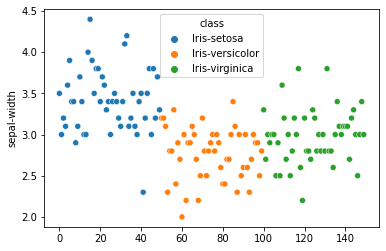

In [20]:
sns.scatterplot(x = dataset.index, y = dataset['sepal-width'], hue=dataset['class'])

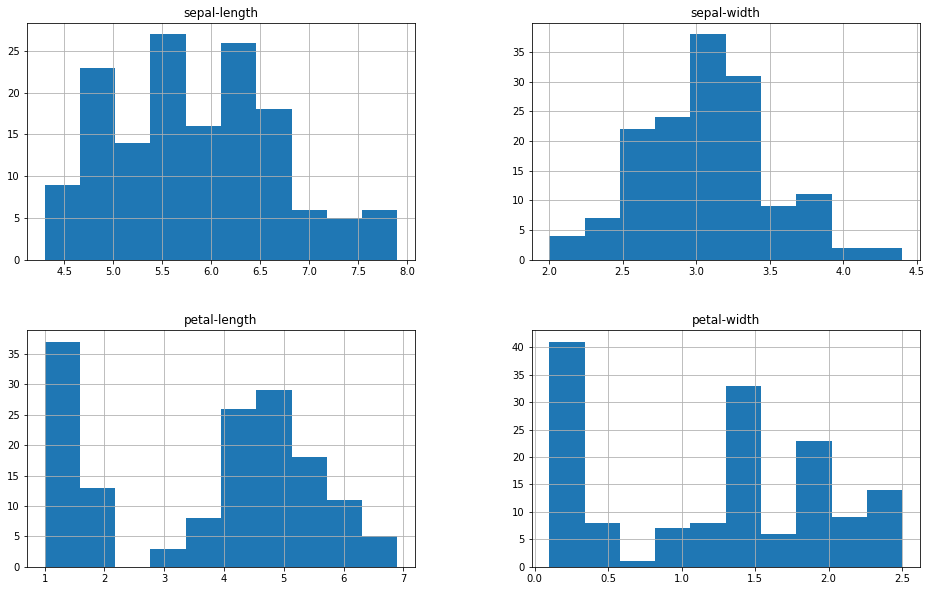

In [33]:
dataset.hist(figsize=(16,10))
pyplot.show()

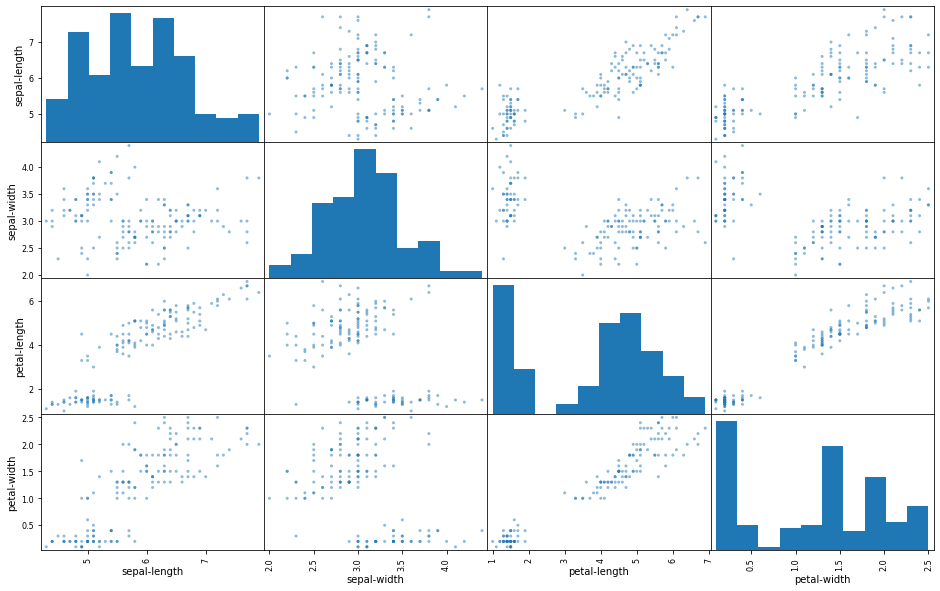

In [32]:
#Multivariate Plots( pair plot)

scatter_matrix(dataset,figsize=(16,10))
pyplot.show()

# Evaluate Some Algorithms

1.Separate out a validation dataset.

2.Set-up the test harness to use 10-fold cross validation.

3.Build multiple different models to predict species from flower measurements

4.Select the best model.


In [38]:
X = dataset.drop('class', axis=1)
y = dataset['class']

In [60]:
# test_size, random_state will affect accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
# using k-fold cross-validation technique
#This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

Let’s test 6 different algorithms: this is classification problem

Logistic Regression (LR)

Linear Discriminant Analysis (LDA)

K-Nearest Neighbors (KNN).

Classification and Regression Trees (CART).

Gaussian Naive Bayes (NB).

Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [62]:
models = []
#append algo
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#evaluate model

result = []
names=[]
for name, model in models:
	kfold= StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_result= cross_val_score(model,X_train, y_train, cv=kfold, scoring='accuracy')
	result.append(cv_result)
	names.append(name)
	print(name, cv_result.mean(), cv_result.std())


LR 0.9416666666666667 0.06508541396588878
LDA 0.975 0.03818813079129868
KNN 0.9583333333333333 0.04166666666666669
CART 0.9499999999999998 0.04082482904638632
NB 0.95 0.05527707983925667
SVM 0.9833333333333332 0.03333333333333335


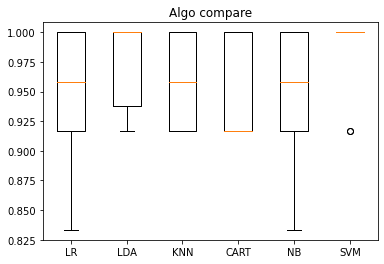

In [63]:
# Compare Algorithms

pyplot.boxplot(result, labels=names)
pyplot.title('Algo compare')
pyplot.show()

Make Predictions

In [64]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Evaluate

In [66]:
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

